# Basic example of regression

### Import needed packages

In [1]:
import sys
import numpy
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import pipeline
from matplotlib import pyplot


### Definition of useful functions

In [2]:
# --------------------------------------------------
def f(x):
    return numpy.sin( 2 * numpy.pi * x )
# --------------------------------------------------

# --------------------------------------------------
def g(x):
    return f(x) + 0.25*numpy.random.randn( len(x) )
# --------------------------------------------------

# --------------------------------------------------
def my_error(real,estimation):
    temp_ = real - estimation
    return numpy.sqrt( 2 * numpy.dot(temp_,temp_) / len(temp_) ) # This method computes the Root Mean Square (RMS) error
    # return 0.5 * numpy.dot(temp_,temp_) / len(temp_) # This computes the Mean Square Error (MSE)
# --------------------------------------------------

### Constants to be modified for changing the behaviour

In [28]:
num_samples=80
max_degree=12
verbose=True
intermediate_graphics=True

### Data preparation

In [29]:
# Generation of the true function for representing it.
zx = numpy.linspace(0.0,1.0,1000)
zy = f(zx)
zx_mat = zx.reshape( len(zx), 1 ) # Converts zx to a matrix with one column. It is needed later in some functions.

# Computation of the limits on y-axis for representing the data.
min_y=zy.min()
max_y=zy.max()
dy = max_y-min_y
min_y = min_y - 0.1 * dy
max_y = max_y + 0.1 * dy

In [30]:
# Generation of the training-set and the test-set
# Values for x-axis equally spaced
#X_train = numpy.linspace( 0.05, 0.95, num_samples )
# Purely random values for x-axis, choose this for observing the behaviour 
# of the technique with few samples in the training set
X_train = numpy.random.rand(num_samples)
X_test = numpy.random.rand( min( 1000, num_samples*10 ) ) # Enough values for the x-axis for the test-set

# Computation the funcion with noise. See the definition of g() above.
Y_train = g(X_train)
Y_test  = g(X_test)

# Computation of the true function. See the definition of f() above.
Y_train_true = f(X_train)
Y_test_true  = f(X_test)

In [31]:
# This is necessary for the fit method, then, accessing one column of matrix X_train_mat is X_train_mat[:,column]
# X_train is also used for representing the scatter-plot.
X_train_mat = X_train.reshape( len(X_train), 1 )
X_test_mat  =  X_test.reshape( len(X_test),  1 )

## Run the regression for different degrees 

Polynomial regression of degree 0: 
Intercept: 0.0
Coef.....: [-0.00857109]


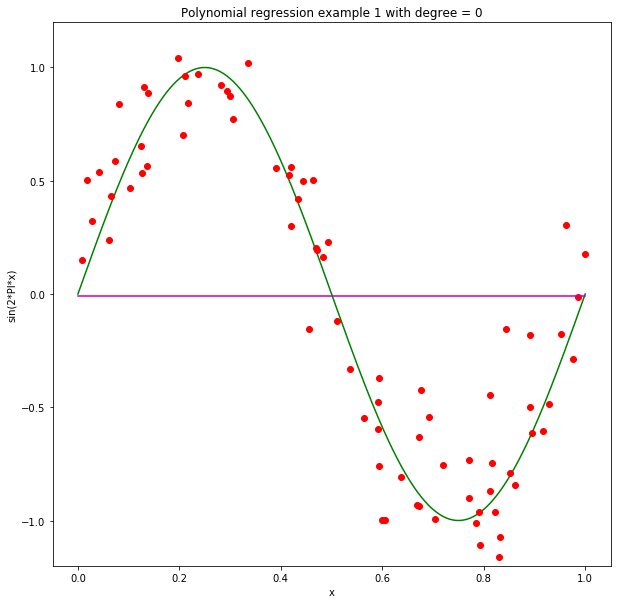

Polynomial regression of degree 1: 
Intercept: 0.0
Coef.....: [ 0.93011167 -1.82561977]


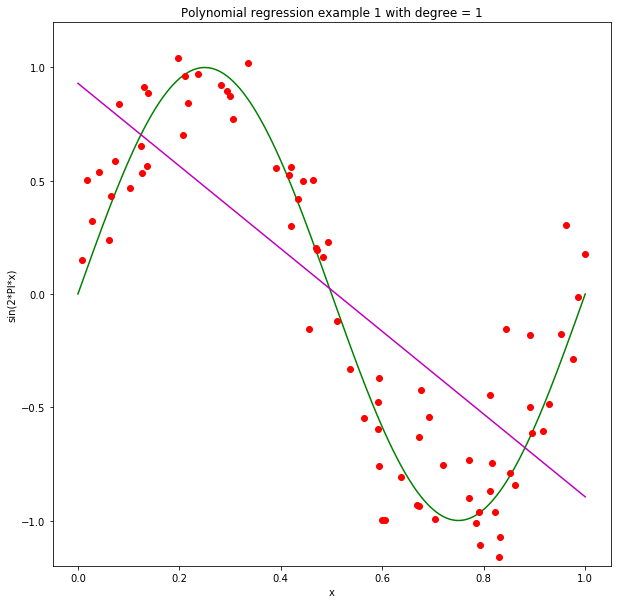

Polynomial regression of degree 2: 
Intercept: 0.0
Coef.....: [ 1.06942114 -2.69556102  0.87420387]


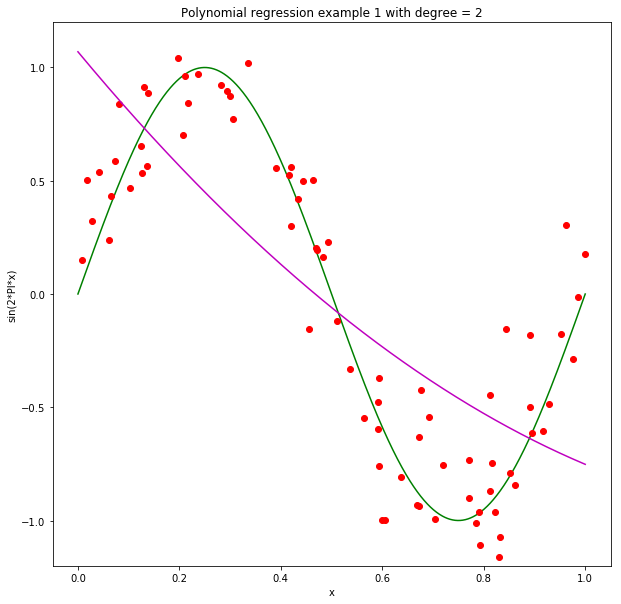

Polynomial regression of degree 3: 
Intercept: 0.0
Coef.....: [  0.1339933    8.94409688 -28.18928177  19.31746256]


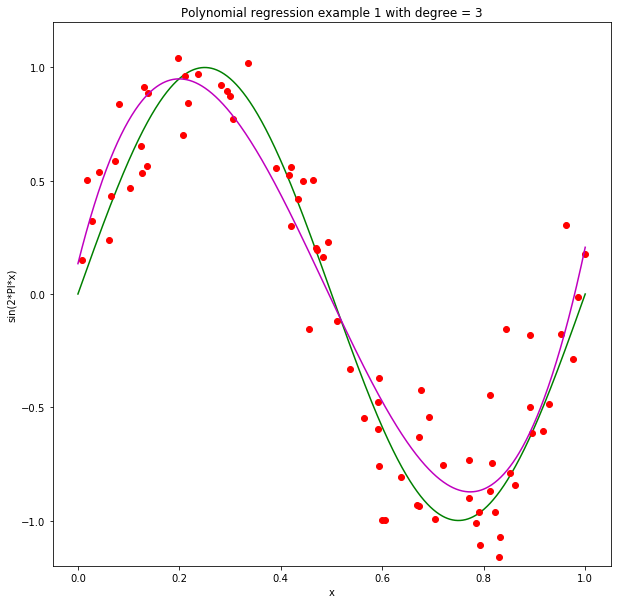

Polynomial regression of degree 4: 
Intercept: 0.0
Coef.....: [  0.20695323   7.03042312 -18.24001743   2.46619854   8.91585442]


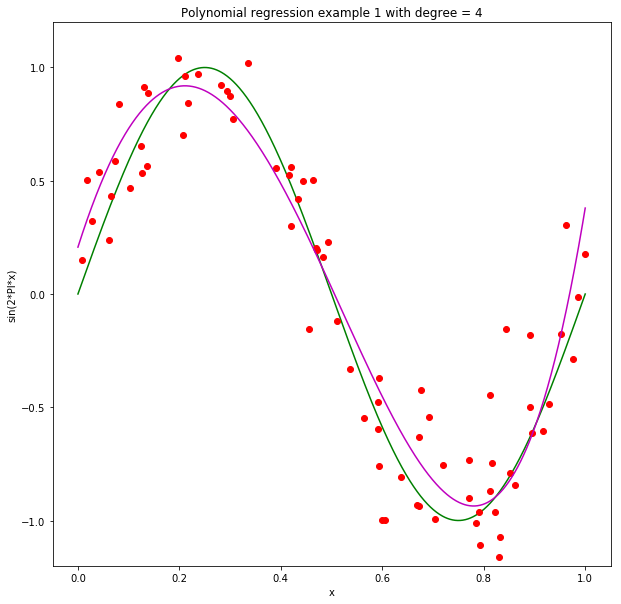

Polynomial regression of degree 5: 
Intercept: 0.0
Coef.....: [  0.19603642   7.203485   -18.6546476    2.00321463  10.77862382
  -1.16582727]


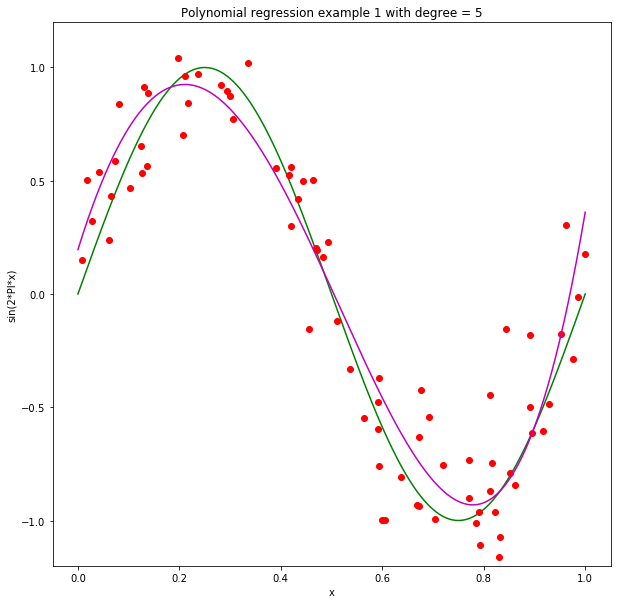

Polynomial regression of degree 6: 
Intercept: 0.0
Coef.....: [  0.16689418   7.46509539 -18.11140206  -1.42564991  10.65007513
   7.83927945  -6.30298785]


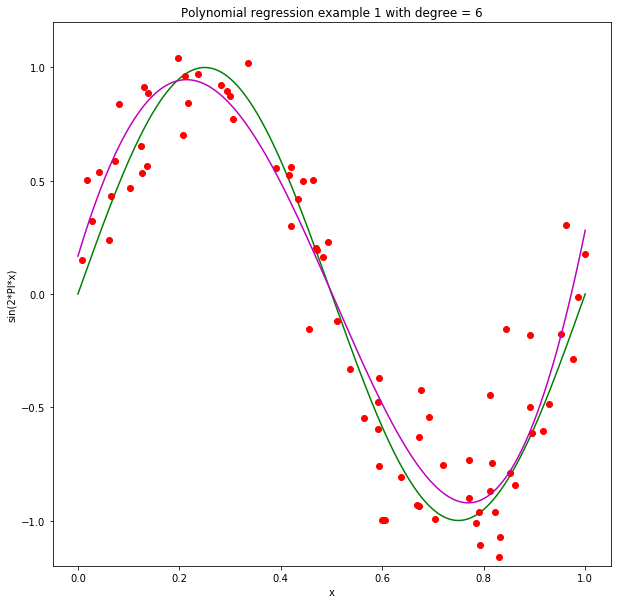

Polynomial regression of degree 7: 
Intercept: 0.0
Coef.....: [  0.1593686    7.33599151 -16.47274773  -3.9667962    7.92913614
   9.65995307   3.23039926  -7.67540825]


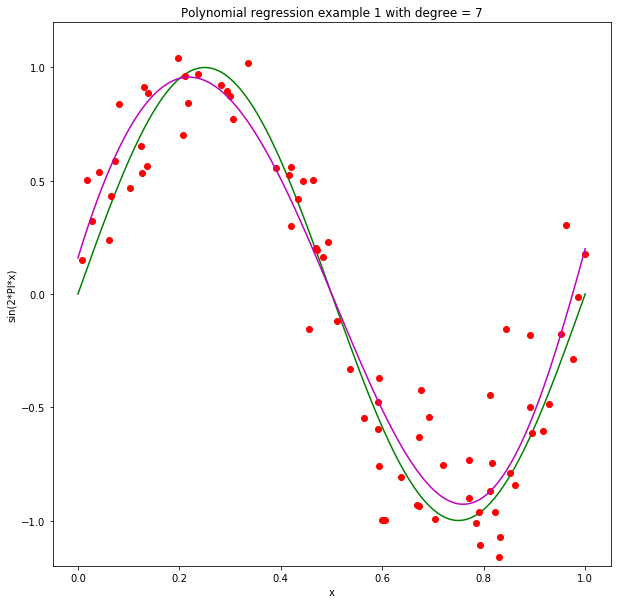

Polynomial regression of degree 8: 
Intercept: 0.0
Coef.....: [  0.16602243   7.06813494 -15.04229644  -4.929101     5.64231008
   8.62636459   5.70783091  -0.18032689  -6.92584929]


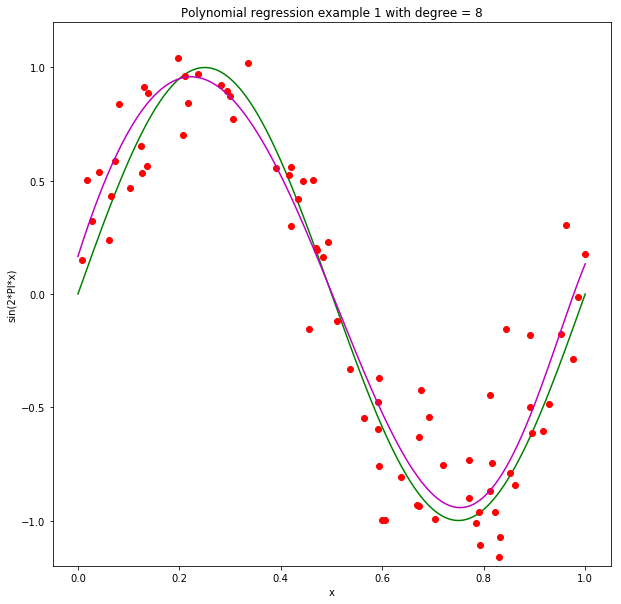

Polynomial regression of degree 9: 
Intercept: 0.0
Coef.....: [  0.17517471   6.8543108  -14.2435176   -4.99222031   4.48158357
   7.38962202   5.63193655   1.9136682   -1.97820053  -5.14644015]


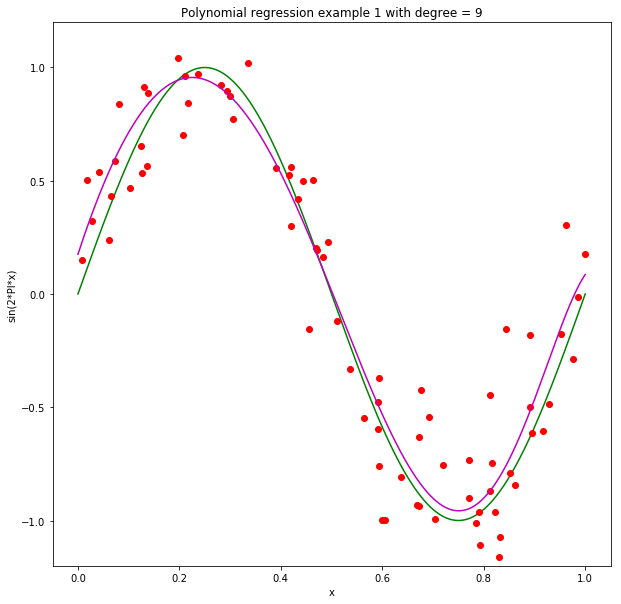

Polynomial regression of degree 10: 
Intercept: 0.0
Coef.....: [  0.18109546   6.74561776 -13.94965318  -4.80961608   4.11290494
   6.7117216    5.15088962   2.13017149  -0.66979354  -2.47508771
  -3.06945838]


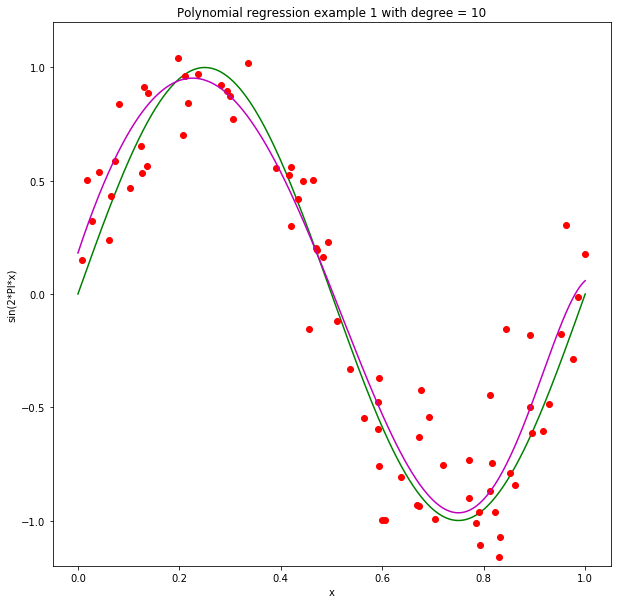

Polynomial regression of degree 11: 
Intercept: 0.0
Coef.....: [  0.18306148   6.71600622 -13.90024531  -4.70415858   4.07087969
   6.5232148    4.93354627   2.02964483  -0.52289329  -1.97962936
  -2.15482997  -1.14557855]


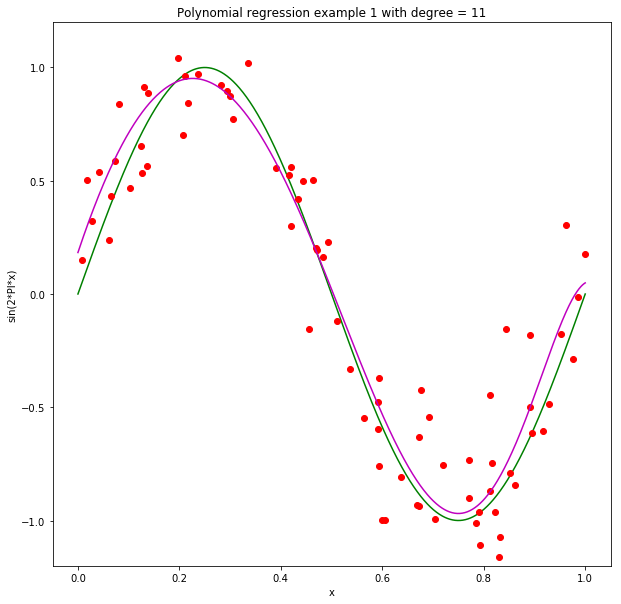

Polynomial regression of degree 12: 
Intercept: 0.0
Coef.....: [  0.18252209   6.72242921 -13.90131539  -4.74410657   4.06241777
   6.5646931    5.0030811    2.08978703  -0.51046536  -2.04767411
  -2.32862058  -1.44307535   0.40265413]


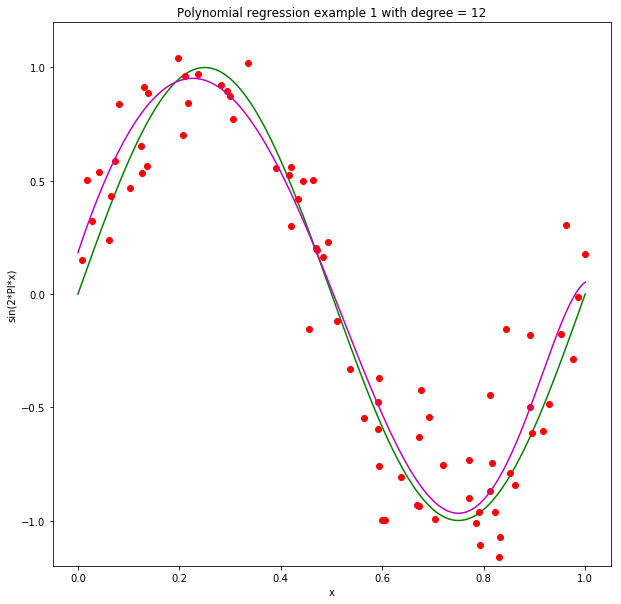

In [33]:
# Preparation of the array for maintaining the evolution of the error.
error_polynomial = numpy.ones( [max_degree+1,2] )

for degree in range(max_degree+1):
    #
    # Creation of the object for transforming the input variables to a polynomial combination of them.
    #
    poly = PolynomialFeatures( degree = degree )
    #
    # PolynomialFeatures.fit_transform() needs a bidimensional array or matrix, with as many rows as samples and as many columns as the dime
    # That's why we do the reshape() some lines above.
    #
    X_  = poly.fit_transform( X_train_mat )
    zx_ = poly.fit_transform( zx_mat )
    #
    # Creation of an object of the class LinearRegresion.
    # Choose one of the following according to the run you are testing.
    # You can test different values of alpha in the Ridge Linear Regression model.
    #
    #linear_regressor = linear_model.LinearRegression( fit_intercept=False )
    linear_regressor = linear_model.Ridge( alpha=0.001, fit_intercept=False )
    #
    # The fit() method trains the model.
    # The transformed input samples are used in order to achieve
    # a polynomial regressor by using a linear one.
    #
    linear_regressor.fit( X_, Y_train )

    if verbose:
        print( 'Polynomial regression of degree %d: ' % degree )
        print( 'Intercept: ' + str(linear_regressor.intercept_) )
        print( 'Coef.....: ' + str(linear_regressor.coef_ ) )

    if intermediate_graphics:
        #pyplot.figure(degree+1)
        pyplot.figure( figsize=(10,10) )
        pyplot.title( "Polynomial regression example 1 with degree = %d" % degree )
        pyplot.xlabel( "x" )
        pyplot.ylabel( "sin(2*PI*x)" )
        plot1 = pyplot.plot( zx, zy, c='g' )
        plot2 = pyplot.plot( X_train, Y_train, 'ro' )
        plot3 = pyplot.plot( zx, linear_regressor.predict(zx_), c='m' )
        pyplot.ylim( min_y, max_y )
        pyplot.show()
        
    error_polynomial[degree][0] = my_error( Y_train_true, linear_regressor.predict( X_ ) )
    error_polynomial[degree][1] = my_error( Y_test_true,  linear_regressor.predict( poly.fit_transform(X_test_mat) ) )

### Print the evolution of the error

In [34]:
if verbose:
    print( " RMS for different degrees of the polynomial features. \n")
    print( "   DEGREE    ERROR ON TRAINING          ERROR ON TEST " )
    print( "------------------------------------------------------" )
    for degree in range(len(error_polynomial)):
        print( " %6d      %17.10f      %17.10f" % (degree, error_polynomial[degree][0], error_polynomial[degree][1] ) )

 RMS for different degrees of the polynomial features. 

   DEGREE    ERROR ON TRAINING          ERROR ON TEST 
------------------------------------------------------
      0           0.9900339489           1.0046452917
      1           0.6134240941           0.6229335570
      2           0.6171455505           0.6306750078
      3           0.1683077363           0.1736607036
      4           0.1689711380           0.1663706999
      5           0.1648599284           0.1628736327
      6           0.1456894528           0.1445592480
      7           0.1300737603           0.1285974056
      8           0.1226053776           0.1205131560
      9           0.1212538976           0.1188653749
     10           0.1221634744           0.1197942500
     11           0.1228388070           0.1205545601
     12           0.1225620503           0.1202234759


### Plot the evolution of the error

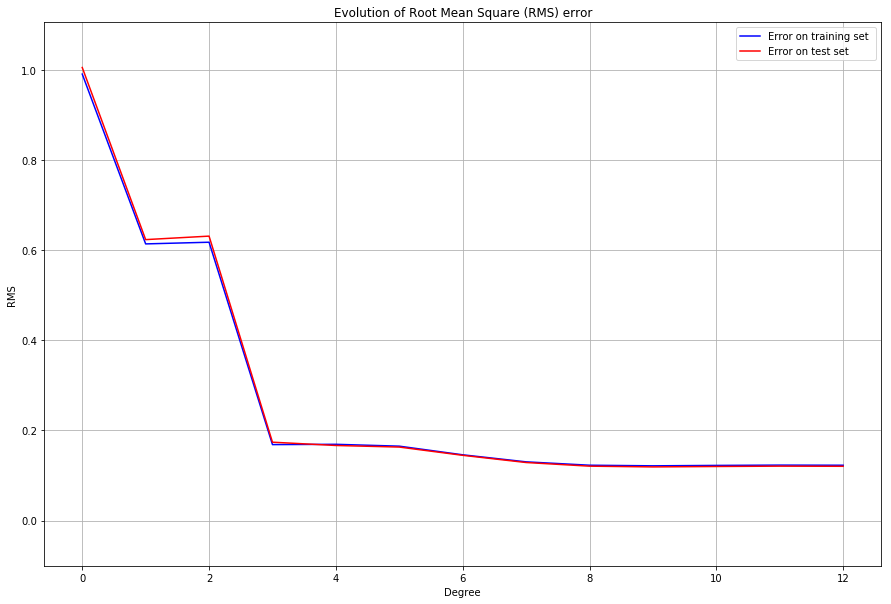

In [35]:
#
# Finally, we represent the evolution of the error as the degree of the polynomial transformation of input samples grows.
#
pyplot.figure( figsize=(15,10))
pyplot.title( "Evolution of Root Mean Square (RMS) error" )
pyplot.xlabel( "Degree" )
pyplot.ylabel( "RMS" )
pyplot.grid()
#
artists=[]
labels=[]
#
plot1 = pyplot.plot( numpy.arange(len(error_polynomial)), error_polynomial[:,0], c='b' )
artists.append( plot1[0] )
labels.append( "Error on training set " )
#
plot2 = pyplot.plot( numpy.arange(len(error_polynomial)), error_polynomial[:,1], c='r' )
artists.append( plot2[0] )
labels.append( "Error on test set " )
#
dy = error_polynomial[:,1].max()
pyplot.ylim( -0.1*dy, 1.1*dy )
#
pyplot.legend( artists, labels )
#
pyplot.show()